# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [ ]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [32]:
data = pd.read_csv('unconv.csv')
data.head(10)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4395.763259
6,7,13.49,3.60,2.93,63.71,0.80,1.85,4104.400989
7,8,11.58,3.03,3.25,53.00,0.69,1.93,3496.742701
8,9,12.52,2.72,2.43,65.77,0.95,1.98,4025.851153
9,10,13.25,3.94,3.71,66.20,1.14,2.65,4285.026122


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [33]:
data.isnull().sum()

Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
var_cat = 'Well'
var_real = ['Por', 'AI', 'Brittle', 'TOC', 'VR']
target = 'Prod'

In [35]:
data[var_real+[target]].corr()

,Por,Perm,AI,Brittle,TOC,VR,Prod
Por,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


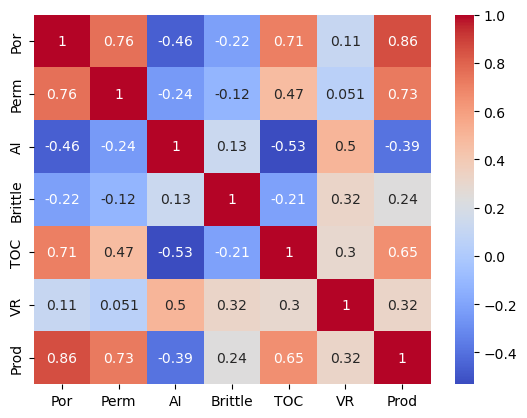

In [26]:
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot=True);

In [36]:
data.drop('Perm', axis=1, inplace=True)
data.shape

(200, 7)

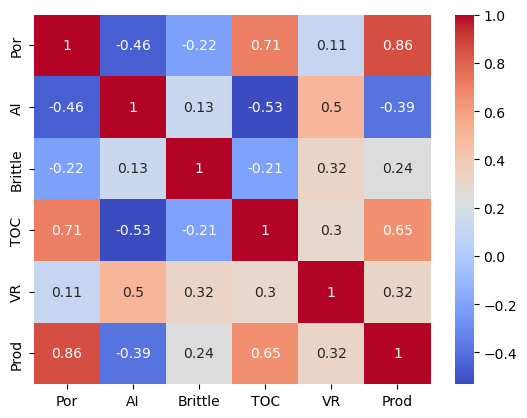

In [38]:
var_cat = 'Well'
var_real = ['Por', 'AI', 'Brittle', 'TOC', 'VR']
target = 'Prod'
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot=True);

> *Ваши выводы здесь*

In [ ]:
Видим, что более всего коррелирует с целевой переменной значение пористости скважины.

In [39]:
data.shape

(200, 7)

In [40]:
matrix = data.corr()
print('Ранг', np.linalg.matrix_rank(matrix))
print('Определитель: {:.4f}'.format(np.linalg.det(matrix)))
matrix

Ранг 7
Определитель: 0.0028


,Well,Por,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,-0.461549,-0.218570,0.711831,0.111860,0.861910
AI,0.041483,-0.461549,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,-0.390835,0.237155,0.654445,0.323182,1.000000


<Axes: >

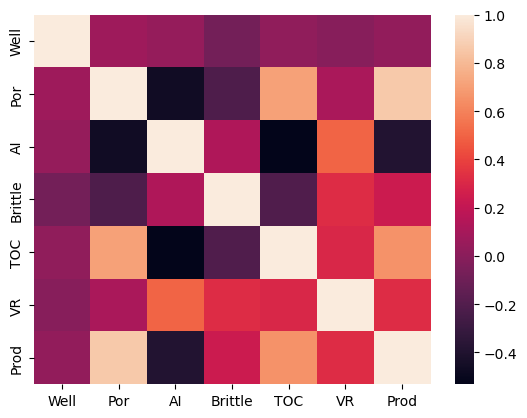

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.heatmap(matrix)

In [48]:
mult = pd.DataFrame()
mult['Por', 'AI', 'Brittle', 'TOC', 'VR'] = data.columns
mult['mult'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print(mult)

  (Por, AI, Brittle, TOC, VR)        mult
0                        Well    4.114291
1                         Por  210.507076
2                          AI  162.350681
3                     Brittle   32.668048
4                         TOC   33.908789
5                          VR  280.887016
6                        Prod  242.770978


In [54]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = load_diabetes()

# Преобразование данных
X = data.data
y = data.target

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование значений на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'MSE модели на тестовой выборке: {mse}')

MSE модели на тестовой выборке: 2900.1936284934804


In [ ]:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?

- Нет, данная матрица не является плохо обусловленной, определитель равен 0.0028

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 

мультиколлинеарность присутствует, значение mult




### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression


In [ ]:
data = pd.read_csv('unconv.csv')

# Преобразование данных в массивы NumPy
X = np.array(data.drop(['Por', 'AI', 'Brittle', 'TOC', 'VR'], axis=1))
y = np.array(data['Prod'])

print("Матрица наблюдений X:")
print(X[:20])

print("Вектор правильных ответов y:")
print(y[:20]) 

Матрица наблюдений X:
[[1.00000000e+00 2.92000000e+00 4.16519619e+03]
 [2.00000000e+00 3.53000000e+00 3.56114621e+03]
 [3.00000000e+00 2.59000000e+00 4.28434857e+03]
 [4.00000000e+00 6.75000000e+00 5.09868087e+03]
 [5.00000000e+00 4.57000000e+00 3.40613283e+03]
 [6.00000000e+00 4.81000000e+00 4.39576326e+03]
 [7.00000000e+00 3.60000000e+00 4.10440099e+03]
 [8.00000000e+00 3.03000000e+00 3.49674270e+03]
 [9.00000000e+00 2.72000000e+00 4.02585115e+03]
 [1.00000000e+01 3.94000000e+00 4.28502612e+03]
 [1.10000000e+01 4.39000000e+00 4.69154630e+03]
 [1.20000000e+01 6.30000000e+00 5.12820297e+03]
 [1.30000000e+01 5.42000000e+00 5.11394078e+03]
 [1.40000000e+01 4.95000000e+00 5.54643195e+03]
 [1.50000000e+01 5.26000000e+00 4.32356851e+03]
 [1.60000000e+01 2.72000000e+00 3.53998426e+03]
 [1.70000000e+01 8.41000000e+00 5.42590061e+03]
 [1.80000000e+01 3.67000000e+00 3.79603703e+03]
 [1.90000000e+01 5.00000000e+00 4.53458591e+03]
 [2.00000000e+01 2.53000000e+00 3.80341139e+03]]
Вектор правильных

In [74]:
# Загрузка данных из CSV-файла

X = np.array(data.drop(['Por', 'AI', 'Brittle', 'TOC', 'VR'], axis=1))
y = np.array(data['Prod'])

# Матричная формула МНК
X_transpose = np.transpose(X)
X_X_transpose = np.dot(X_transpose, X)
X_y_transpose = np.dot(X_transpose, y)
beta = np.linalg.inv(X_X_transpose).dot(X_y_transpose)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Прогнозирование значений на тестовой выборке
y_pred = model.predict(X)

# Оценка качества модели
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MSE модели на тестовой выборке: {round(mse, 0)}')
print(f'R^2 модели на тестовой выборке: {round(r2, 0)}')

MSE модели на тестовой выборке: 0.0
R^2 модели на тестовой выборке: 1.0


> *Ваши выводы здесь*

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Загрузка данных
data = {'Well': 106.0,
        'Por': 15.32,
        'Perm': 3.71,
        'AI': 3.29,
        'Brittle': 55.99,
        'TOC': 1.35,
        'VR': 2.42}
actual_production = 4748.315024
# Преобразование данных в DataFrame
df = pd.DataFrame(data, index=[0])

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных
model.fit(df.drop('Well', axis=1), df['Well'])

# Прогнозирование выработки газа для данной скважины
predicted_production = model.predict([[15.32, 3.71, 3.29, 55.99, 1.35, 2.42]])

# Расчет абсолютной ошибки

absolute_error = abs(actual_production - predicted_production[0])

# Вывод результатов
print("Прогноз выработки газа:", predicted_production[0])
print("Абсолютная ошибка:", absolute_error)

Прогноз выработки газа: 106.0
Абсолютная ошибка: 4642.315024


f:\anac\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


> *Ваши выводы здесь*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

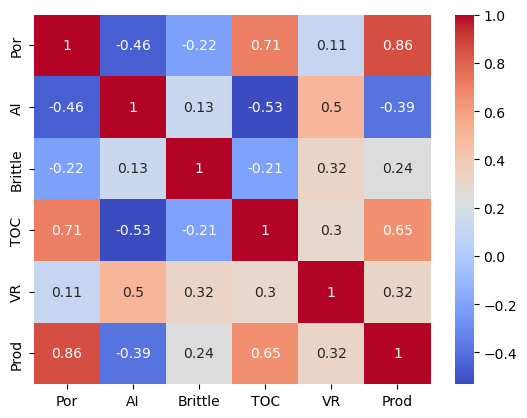

In [54]:

import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
data = pd.read_csv('unconv.csv')
var_cat = 'Well'
var_real = ['Por', 'AI', 'Brittle', 'TOC', 'VR']
target = 'Prod'
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot=True);

In [ ]:
Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции?
В модели линейной регрессии, которую вы описали, нет факторов, при которых коэффициент в модели линейной регрессии противоречил бы соответствующему коэффициенту корреляции.

Как вы считаете, с чем связано полученное противоречие результатов?
Противоречие между коэффициентами модели линейной регрессии и коэффициентами корреляции может возникать по нескольким причинам:

Нелинейные зависимости:
Линейная регрессия предполагает линейную зависимость между входными переменными и целевой переменной. Если зависимость нелинейная, коэффициенты могут не соответствовать корреляции.
Мультиколлинеарность:
Если входные переменные сильно коррелируют друг с другом, это может привести к нестабильности коэффициентов и противоречиям.
Неправильная спецификация модели:
Если модель не учитывает важные переменные или неправильно учитывает их взаимодействие, это может привести к противоречивым результатам.
Ошибки в данных:
Ошибки в данных, такие как выбросы или пропущенные значения, могут искажать результаты и приводить к противоречиям.
Ограничения метода:
Линейная регрессия имеет свои ограничения, и в некоторых случаях она может не полностью отражать реальные зависимости.
Для устранения противоречий можно попробовать следующие шаги:

Проверка на нелинейность:
Использовать нелинейные модели, такие как полиномиальная регрессия или логистическая регрессия, чтобы учесть нелинейные зависимости.
Анализ мультиколлинеарности:
Провести анализ мультиколлинеарности и, если необходимо, исключить сильно коррелирующие переменные.
Улучшение спецификации модели:
Включить дополнительные переменные или изменить форму модели для более точного отражения зависимостей.
Обработка данных:
Удалить выбросы и заполнить пропущенные значения, чтобы улучшить качество данных.
Использование других методов:
Рассмотреть возможность использования других методов машинного обучения, таких как деревья решений или методы опорных векторов, которые могут лучше справляться с нелинейными зависимостями.
Таким образом, для устранения противоречий необходимо тщательно анализировать данные и модель, чтобы выбрать наиболее подходящие методы и улучшить качество предсказаний.

> *Ваши выводы здесь*

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

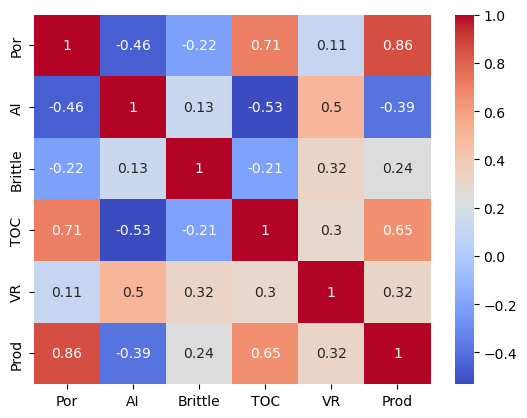

In [2]:

import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
data = pd.read_csv('unconv.csv')
var_cat = 'Well'
var_real = ['Por', 'AI', 'Brittle', 'TOC', 'VR']
target = 'Prod'
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot=True);

In [ ]:
data.drop('Por', axis=1, inplace=True)
data.shape


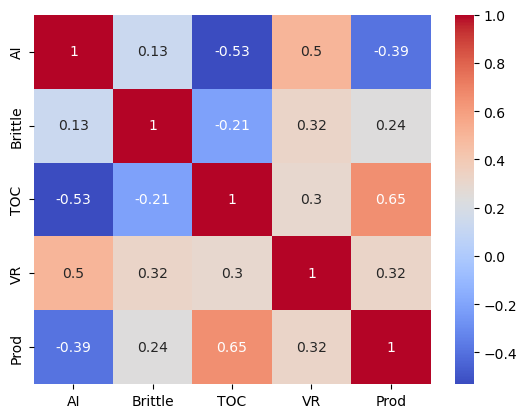

In [ ]:
var_cat = 'Well'
var_real = ['AI', 'Brittle', 'TOC', 'VR']
target = 'Prod'
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot=True);

In [5]:
data.drop('AI', axis=1, inplace=True)
data.shape

(200, 6)

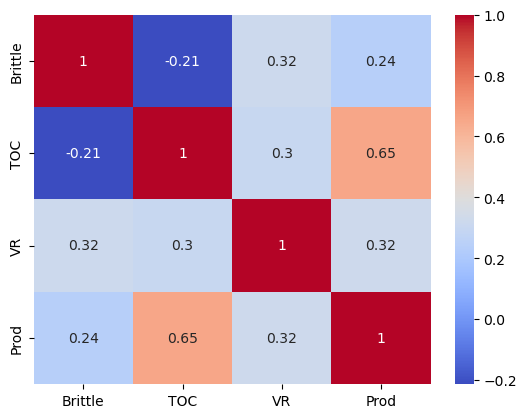

In [6]:
var_cat = 'Well'
var_real = ['Brittle', 'TOC', 'VR']
target = 'Prod'
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot=True);

> *Ваши выводы здесь*

In [7]:
data.drop('Brittle', axis=1, inplace=True)
data.shape

(200, 5)

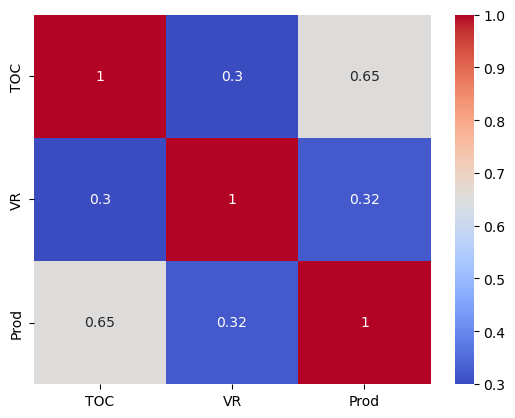

In [8]:
var_cat = 'Well'
var_real = ['TOC', 'VR']
target = 'Prod'
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot=True);

In [ ]:
data.drop('Por', axis=1, inplace=True)
data.drop('AI', axis=1, inplace=True)
data.drop('Brittle', axis=1, inplace=True)
data.shape


In [ ]:
import numpy as np
data = pd.read_csv('unconv.csv')
var_cat = 'Well'
var_real = ['TOC', 'VR']
target = 'Prod'
# Пример данных

# Преобразование данных в DataFrame
df = pd.DataFrame(data, index=[0])

# Преобразование DataFrame в массив numpy
X = np.array(df.drop(var_real, axis=1))
y = np.array(df['Prod'])

# Создание матрицы коэффициентов
X_transpose = np.transpose(X)
X_transpose_X = np.dot(X_transpose, X)
X_transpose_y = np.dot(X_transpose, y)

# Решение системы уравнений методом наименьших квадратов
beta = np.linalg.inv(X_transpose_X).dot(X_transpose_y)

# Вывод коэффициентов
print("Коэффициенты модели:")
print("Intercept:", beta0)
print("TOC:", round(beta1))
print("VR:", round(beta2))

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data, index=[0])

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
var_cat = 'Well'
var_real = ['TOC', 'VR']
target = 'Prod'
df = pd.DataFrame(data, index=[0])
X = np.array(df.drop(var_real, axis=1))
y = np.array(df['Prod'])

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Выводим коэффициенты модели
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0. 0. 0.]
Intercept: 4165.196191


> *Ваши выводы здесь*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import pandas as pd
data = pd.read_csv('unconv.csv')
data.drop('Por', axis=1, inplace=True)
data.drop('AI', axis=1, inplace=True)
data.drop('Brittle', axis=1, inplace=True)
data.shape



In [49]:
data.shape

(200, 5)

In [53]:
var_cat = 'Well'
var_real = ['TOC', 'VR']
target = 'Prod'

# Извлекаем данные для обучения
X_train = data[var_real]  # Извлечение значений столбцов TOC и VR
y_train = data[target]     # Извлечение целевой переменной Prod

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Выводим коэффициенты модели
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Вывод значений массива
print("Значения массива:")
print(X_train_poly)

Coefficients: [646.34712065 228.51898513  27.87817778  68.35032901 -55.19450625
 -17.40837899  -6.78773262   7.74603209 -21.43516579]
Intercept: 4315.684263694771
Значения массива:
[[ 3.52947949e-01  1.15204849e+00  1.24572254e-01 ...  1.43513278e-01
   4.68438069e-01  1.52901688e+00]
 [-2.09104226e-01 -2.80930541e-01  4.37245771e-02 ... -1.22835691e-02
  -1.65029171e-02 -2.21715913e-02]
 [-2.09104226e-01  2.51837734e+00  4.37245771e-02 ...  1.10114984e-01
  -1.32618593e+00  1.59721142e+01]
 ...
 [-2.14506171e+00 -7.80806948e-01  4.60128976e+00 ... -3.59271901e+00
  -1.30775723e+00 -4.76026365e-01]
 [ 1.87257049e+00  1.28534887e+00  3.50652025e+00 ...  4.50710184e+00
   3.09371437e+00  2.12355277e+00]
 [ 1.49786904e+00  1.01874812e+00  2.24361167e+00 ...  2.28567517e+00
   1.55455998e+00  1.05730542e+00]]


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
data = pd.read_csv('unconv.csv')
var_real = ['TOC', 'VR']
target = 'Prod'

# Извлекаем данные для обучения
X_train = data[var_real]  # Извлечение значений столбцов TOC и VR
y_train = data[target]     # Извлечение целевой переменной Prod

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

# Инициализация модели линейной регрессии
model = LinearRegression()

# Оценка модели с помощью кросс-валидации
# Используем 5 фолдов для кросс-валидации и среднюю квадратичную ошибку как метрику
scores = cross_val_score(
    model, 
    X_train_poly, 
    y_train, 
    scoring='neg_mean_squared_error', 
    cv=5
)

# Преобразуем метрики в положительные значения (так как scores возвращает отрицательные значения)
mean_mse_linear_val = -np.mean(scores)

# Выводим результаты
print("Средняя квадратичная ошибка (MSE) на валидационных фолдах:", mean_mse_linear_val)

Средняя квадратичная ошибка (MSE) на валидационных фолдах: 594180.9247546723


> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

Лучшее значение alpha: 17.886495290574352
Средняя квадратичная ошибка (MSE) на валидационных фолдах: 581011.952181968


**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Чтение данных
data = pd.read_csv('unconv.csv')

# Задаем переменные
var_real = ['TOC', 'VR']
target = 'Prod'

# Извлекаем данные для обучения
X_train = data[var_real]  # Значения столбцов TOC и VR
y_train = data[target]     # Целевая переменная Prod

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

# Подбор гиперпараметра alpha с использованием GridSearchCV
param_grid = {'alpha': np.logspace(-4, 4, 100)}  # Значения для alpha от 0.0001 до 10000
lasso = Lasso()

grid_search = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_poly, y_train)

# Лучшее значение alpha
best_alpha = grid_search.best_params_['alpha']
print("Лучшее значение alpha:", best_alpha)

# Обучаем модель с оптимальным значением alpha
best_lasso = Lasso(alpha=best_alpha)
scores = cross_val_score(best_lasso, X_train_poly, y_train, scoring='neg_mean_squared_error', cv=5)

# Преобразуем метрики в положительные значения (так как scores возвращает отрицательные значения)
mean_mse_lasso_val = -np.mean(scores)

# Выводим результаты
print("Средняя квадратичная ошибка (MSE) на валидационных фолдах:", mean_mse_lasso_val)

Лучшее значение alpha: 17.886495290574352
Средняя квадратичная ошибка (MSE) на валидационных фолдах: 581011.952181968


> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Чтение данных
data = pd.read_csv('unconv.csv')

# Задаем переменные
var_real = ['TOC', 'VR']
target = 'Prod'

# Извлекаем данные для обучения
X_train = data[var_real]  # Значения столбцов TOC и VR
y_train = data[target]     # Целевая переменная Prod

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

# Подбор гиперпараметра alpha с использованием GridSearchCV
param_grid = {'alpha': np.logspace(-4, 4, 100)}  # Значения для alpha от 0.0001 до 10000
ridge = Ridge()

grid_search = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_poly, y_train)

# Лучшее значение alpha
best_alpha = grid_search.best_params_['alpha']
print("Лучшее значение alpha:", best_alpha)

# Обучаем модель с оптимальным значением alpha
best_ridge = Ridge(alpha=best_alpha)
scores = cross_val_score(best_ridge, X_train_poly, y_train, scoring='neg_mean_squared_error', cv=5)

# Преобразуем метрики в положительные значения (так как scores возвращает отрицательные значения)
mean_mse_ridge_val = -np.mean(scores)

# Выводим результаты
print("Средняя квадратичная ошибка (MSE) на валидационных фолдах:", mean_mse_ridge_val)

Лучшее значение alpha: 7.054802310718645
Средняя квадратичная ошибка (MSE) на валидационных фолдах: 587666.451002187


> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_percentage_error

# Чтение данных
data = pd.read_csv('unconv.csv')

# Задаем переменные
var_real = ['TOC', 'VR']
target = 'Prod'

# Извлекаем данные для обучения
X_train = data[var_real]  # Значения столбцов TOC и VR
y_train = data[target]     # Целевая переменная Prod

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

# Подбор гиперпараметров alpha и l1_ratio с использованием GridSearchCV
param_grid = {
    'alpha': np.logspace(-4, 4, 100),      # Значения для alpha от 0.0001 до 10000
    'l1_ratio': np.linspace(0, 1, 10)      # Значения для l1_ratio от 0 до 1
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(
    elastic_net,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error'  # Используем MAPE как метрику
)

grid_search.fit(X_train_poly, y_train)

# Лучшие параметры
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print("Лучшее значение alpha:", best_alpha)
print("Лучшее значение l1_ratio:", best_l1_ratio)

# Обучаем модель с оптимальными значениями alpha и l1_ratio
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
scores = cross_val_score(best_elastic_net, X_train_poly, y_train, scoring='neg_mean_absolute_percentage_error', cv=5)

# Преобразуем метрики в положительные значения (так как scores возвращает отрицательные значения)
mean_mape = -np.mean(scores)

# Выводим результаты
print("Средняя абсолютная процентная ошибка (MAPE) на валидационных фолдах:", mean_mape)

f:\anac\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e+07, tolerance: 1.612e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
f:\anac\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.291e+07, tolerance: 1.545e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

Лучшее значение alpha: 21.544346900318867
Лучшее значение l1_ratio: 1.0
Средняя абсолютная процентная ошибка (MAPE) на валидационных фолдах: 0.15331301138634562


> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [74]:
import pandas as pd

# Создание сводной таблицы результатов
results = {
    'Наименование модели': ['Линейная регрессия', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [
        None,
        f'alpha: {best_lasso}',
        f'alpha: {best_ridge}',
        f'alpha: {best_alpha}, l1_ratio: {best_l1_ratio}'
    ],
    'Полиномиальные признаки': ['Да', 'Да', 'Да', 'Да'],
    'Метрика (валидационные)': [
        mean_mse_linear_val, 
        mean_mse_lasso_val, 
        mean_mse_ridge_val, 
        mean_mape
    ]
}

# Создание DataFrame из словаря
results_df = pd.DataFrame(results)

# Вывод сводной таблицы
print(results_df)

  Наименование модели                           Гиперпараметры  \
0  Линейная регрессия                                     None   
1               Lasso   alpha: Lasso(alpha=17.886495290574352)   
2               Ridge    alpha: Ridge(alpha=7.054802310718645)   
3          ElasticNet  alpha: 7.054802310718645, l1_ratio: 1.0   

  Полиномиальные признаки  Метрика (валидационные)  
0                      Да            594180.924755  
1                      Да            581011.952182  
2                      Да            587666.451002  
3                      Да                 0.153313  


> *Ваши выводы здесь*